In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_set = train[['Open']]

<AxesSubplot:>

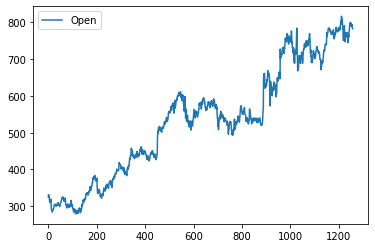

In [5]:
train_set.plot()

In [6]:
train_set.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
normalizer = MinMaxScaler(feature_range=(0,1))

In [9]:
train_set_scale = normalizer.fit_transform(train_set)

In [10]:
X_train = []
Y_train = []
for i in range(len(train_set_scale)-60):
    X_train.append(train_set_scale[i:i+60,0])
    Y_train.append(train_set_scale[i+60,0])

In [11]:
X_train = np.array(X_train)

In [12]:
Y_train = np.array(Y_train)

In [13]:
X_train = np.reshape(X_train, newshape= (X_train.shape[0], X_train.shape[1],1))

In [14]:
X_train.shape

(1198, 60, 1)

In [15]:
Y_train.shape

(1198,)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50, return_sequences= True, input_shape= (X_train.shape[1],1)))

In [19]:
from keras.layers import Dropout

In [20]:
#model.add(Dropout(rate=0.2))

In [21]:
model.add(LSTM(units=50, return_sequences= True))

In [22]:
#model.add(Dropout(rate=0.2))

In [23]:
model.add(LSTM(units=50))
#model.add(Dropout(rate=0.2))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
Total params: 50,800
Trainable params: 50,800
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.add(Dense(units=1,activation='linear'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [28]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0335 - accuracy: 0.0017
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 5/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 7/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 8/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 10/100
1198/1198 [==============================]

1198/1198 [==============================] - 13s 11ms/step - loss: 3.0947e-04 - accuracy: 0.0017
Epoch 77/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.3351e-04 - accuracy: 0.0017
Epoch 78/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.4782e-04 - accuracy: 0.0017
Epoch 79/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.0933e-04 - accuracy: 0.0017
Epoch 80/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.1933e-04 - accuracy: 0.0017
Epoch 81/100
1198/1198 [==============================] - 13s 11ms/step - loss: 4.0969e-04 - accuracy: 0.0017
Epoch 82/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.1522e-04 - accuracy: 0.0017
Epoch 83/100
1198/1198 [==============================] - 13s 11ms/step - loss: 2.9678e-04 - accuracy: 0.0017
Epoch 84/100
1198/1198 [==============================] - 13s 11ms/step - loss: 3.9363e-04 - accuracy: 0.0017
Epoch 85/100
1198/1198 

In [29]:
loss = model.history.history['loss']

In [30]:
import matplotlib.pyplot as plt

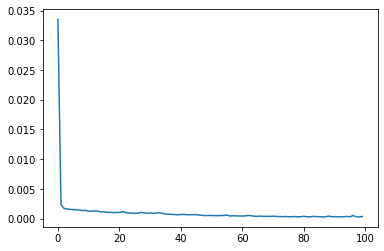

In [31]:
plt.plot(loss)

In [32]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [33]:
test_set = test[['Open']].values

In [34]:
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [35]:
ds_total = pd.concat((train['Open'],test['Open']),axis=0)

In [36]:
ds_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [37]:
inputs = ds_total[len(ds_total)-len(test)-60:].values

In [38]:
inputs = inputs.reshape(-1,1)

In [39]:
inputs = normalizer.transform(inputs)

In [40]:
X_test = []

In [41]:
for i in range(60, len(inputs)): 
    X_test.append(inputs[i-60: i, 0])

In [42]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0],X_test.shape[1], 1))

In [43]:
predicted = model.predict(X_test)

In [44]:
predicted = normalizer.inverse_transform(predicted)

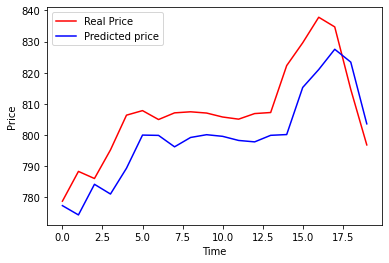

In [45]:
plt.plot(test_set,color='red',label='Real Price')
plt.plot(predicted,color='blue',label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()